   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

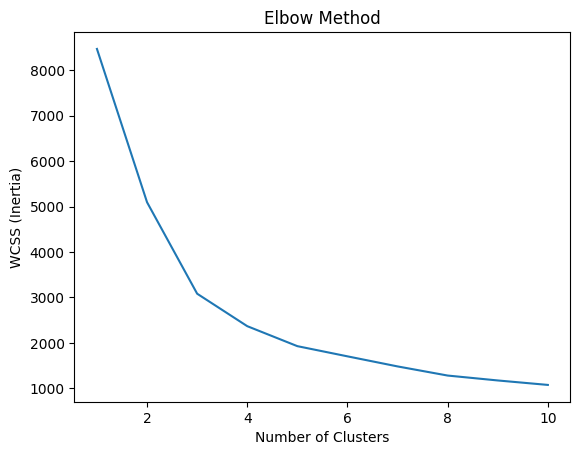

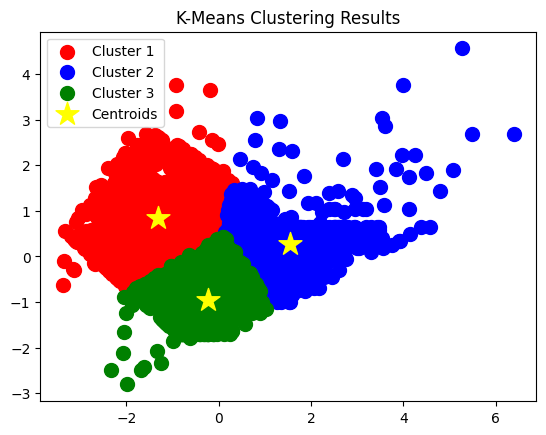

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# Check the first few rows of the dataset
print(df.head())

# Preprocess the data (select relevant features and handle missing values)
# For simplicity, let's focus on the numeric columns for clustering
df = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']]

# Handle missing values if any
df = df.dropna()

# Normalize the data (scaling the features)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 1: K-Means Clustering and Elbow Method

# Function to plot the elbow method to determine the number of clusters
def plot_elbow_method(data):
    wcss = []  # Within-Cluster Sum of Squares
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Inertia)')
    plt.show()

# Plot the elbow method
plot_elbow_method(df_scaled)

# Step 2: Apply K-Means with optimal number of clusters (based on elbow plot)
# Let's assume the optimal number of clusters is 3 (determine this from elbow plot)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

# Step 3: Visualize the clusters using PCA (for dimensionality reduction)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.scatter(df_pca[y_kmeans == 0, 0], df_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_pca[y_kmeans == 1, 0], df_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_pca[y_kmeans == 2, 0], df_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Plot cluster centers (transform using PCA)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='*', label='Centroids')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()




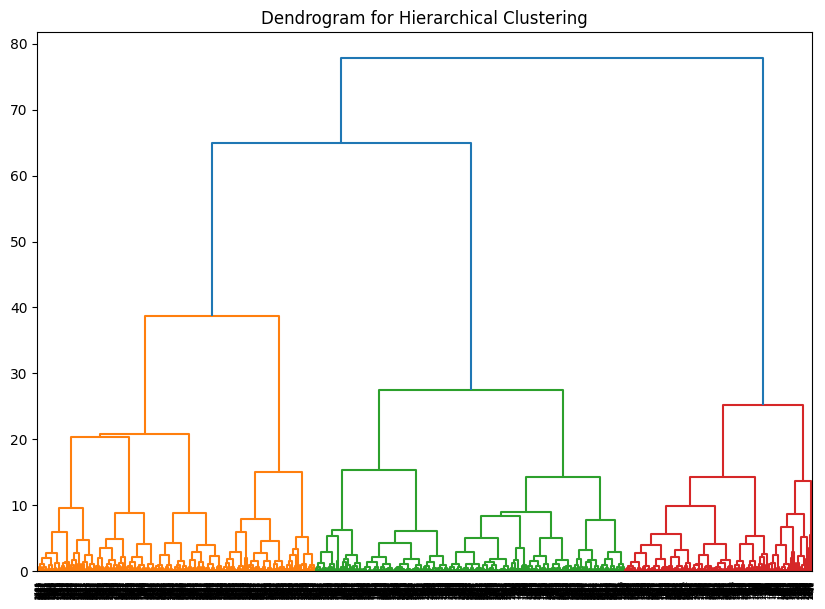

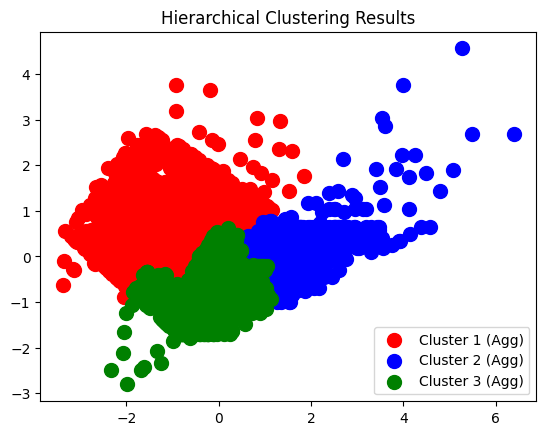

In [6]:
# Step 4: Hierarchical Clustering (Optional)

# Perform hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Plot the dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
y_agg = agg_clust.fit_predict(df_scaled)

# Add the cluster labels from hierarchical clustering to the original dataframe
df['Agg_Cluster'] = y_agg

# Optional: Visualize hierarchical clusters using PCA (same method as before)
plt.scatter(df_pca[y_agg == 0, 0], df_pca[y_agg == 0, 1], s=100, c='red', label='Cluster 1 (Agg)')
plt.scatter(df_pca[y_agg == 1, 0], df_pca[y_agg == 1, 1], s=100, c='blue', label='Cluster 2 (Agg)')
plt.scatter(df_pca[y_agg == 2, 0], df_pca[y_agg == 2, 1], s=100, c='green', label='Cluster 3 (Agg)')

plt.title('Hierarchical Clustering Results')
plt.legend()
plt.show()